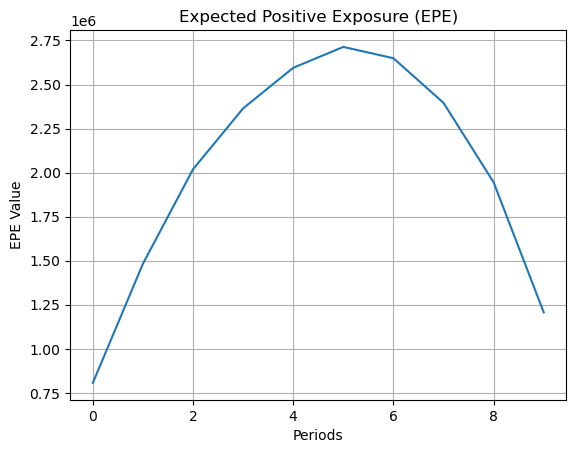

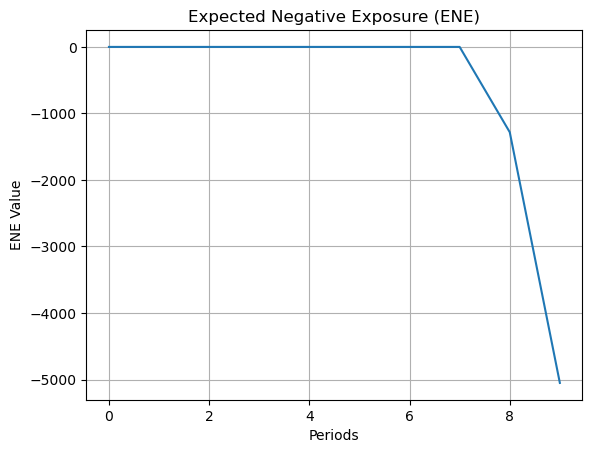

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('LMM_data1.csv')

times = data['t'].values
fwd0 = data['fwd'].values

#print(fwd0)
days = 252

periods = 10
Nums = periods 
sim = 1000
fwd = np.zeros((sim, Nums, periods))
Dev = np.zeros((sim, Nums))
Timestep = np.zeros(periods + 1)
correl = np.zeros(periods + 1)
fwdvol = np.zeros(periods + 1)
Notional = np.zeros(periods + 1)
fixed_rate = np.zeros(periods + 1)
df = np.zeros((sim, Nums, periods + 1))
MtM = np.zeros((sim, periods))



for k in range(periods + 1):
    Timestep[k] = 1
    correl[k] = 1
    fwdvol[k] = 0.2
    fixed_rate[k]= 0.072
    Notional[k] = 10000000
    
#print(Timestep)


for i in range(sim):
    Orgsumfxd = 0
    Orgsumflt = 0
    df[i, 0, 0] = 1
    j = 0
    for k in range(periods):
        fwd[i, 0, k] = fwd0[k]
        df[i, j, k + 1] = np.exp(-fwd[i, j, k] * Timestep[k]) * df[i, j, k]
        Orgsumfxd += Notional[k] * fixed_rate[k] * df[i, j, k + 1]
        Orgsumflt += Notional[k] * fwd[i, j, k] * df[i, j, k + 1]

    #print(Orgsumfxd)
    #print(Orgsumflt)
    
    MtM[i, 0] = Orgsumflt - Orgsumfxd

    for j in range(1, periods):
        drift = 0   
        sumfxd = 0
        sumflt = 0
        for k in range(j, periods):
            Z1 = np.random.normal(0,1)
            drift += (Timestep[k-1] * fwd[i, j-1, k] * fwdvol[j] * correl[k-1]) / (1 + fwd[i, j-1, k] * Timestep[k-1]) 
            fwd[i, j, k] = fwd[i, j-1, k] * np.exp((drift * fwdvol[k-1] - 0.5 * fwdvol[k-1] ** 2) * Timestep[k-1] + fwdvol[k-1] * Timestep[k-1] ** 0.5 * Z1)
            df[i, j, j] = 1
            df[i, j, k + 1] = np.exp(-fwd[i, j, k] * Timestep[k]) * df[i, j, k]
            
            sumfxd += Timestep[k] * Notional[k] * fixed_rate[k] * df[i, j, k + 1]
            sumflt += Timestep[k] * Notional[k] * fwd[i, j, k] * df[i, j, k + 1]
            
        MtM[i, j] = sumflt - sumfxd
    
#print(df)
#print(fwd)

#print(MtM)


EPE = np.mean(np.where(MtM > 0, MtM, 0), axis=0)
EPE_rounded = np.round(EPE).astype(int)
formatted_EPE = ', '.join(map(str, EPE_rounded))
#print(formatted_EPE)


ENE = np.mean(np.where(MtM < 0, MtM, 0), axis=0)
ENE_rounded = np.round(ENE).astype(int)
formatted_ENE = ', '.join(map(str, ENE_rounded))
#print(formatted_ENE)


plt.plot(range(periods), EPE_rounded)
plt.title('Expected Positive Exposure (EPE)')
plt.xlabel('Periods')
plt.ylabel('EPE Value')
plt.grid(True)
plt.show()

plt.plot(range(periods), ENE_rounded)
plt.title('Expected Negative Exposure (ENE)')
plt.xlabel('Periods')
plt.ylabel('ENE Value')
plt.grid(True)
plt.show()


df_df = pd.DataFrame(df.reshape(sim, -1))  
fwd_df = pd.DataFrame(fwd.reshape(sim, -1))  
MtM_df = pd.DataFrame(MtM.reshape(sim, -1))

#with pd.ExcelWriter('output.xlsx') as writer:
#    df_df.to_excel(writer, sheet_name='DF', index=False)
#    fwd_df.to_excel(writer, sheet_name='FWD', index=False)
#    MtM_df.to_excel(writer, sheet_name='MtM', index = False)


In [12]:
import os
current_path = os.getcwd()
print(current_path)

C:\Users\Laptop\pricing_models
